# Locations, Industries and Years: A Deep Dive into Unicorn Companies


**Project 1 - Python Data Analysis**\
**June 2022**

A unicorn company is a private startup company valued at over US $1 billion. This exploratory analysis dives into features and trends of unicorns.

# *Data*
* https://www.kaggle.com/datasets/mysarahmadbhat/unicorn-companies/code?select=Unicorn_Companies.csv

# *Code*

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Load data

In [2]:
raw_unicorn2022 = pd.read_csv('data/Unicorn_Companies.csv',na_values=['None','Unknown'])

In [3]:
raw_unicorn2022.shape #(1074, 10)

(1074, 10)

In [4]:
raw_unicorn2022.columns

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City', 'Country',
       'Continent', 'Year Founded', 'Funding', 'Select Investors'],
      dtype='object')

In [5]:
raw_unicorn2022.dtypes

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country             object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

In [6]:
raw_unicorn2022.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [7]:
pd.isnull(raw_unicorn2022).sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding             12
Select Investors     1
dtype: int64

In [8]:
# save a copy of original data
unicorn2022 = raw_unicorn2022.copy()

# Step 1: Preliminary check, pre-processing & data cleaning

**1. change column names:**

In [9]:
unicorn2022.columns

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City', 'Country',
       'Continent', 'Year Founded', 'Funding', 'Select Investors'],
      dtype='object')

In [10]:
unicorn2022.columns = unicorn2022.columns.str.lower().str.replace(' ', '_')
unicorn2022.columns

Index(['company', 'valuation', 'date_joined', 'industry', 'city', 'country',
       'continent', 'year_founded', 'funding', 'select_investors'],
      dtype='object')

**2. check and change data type:**

In [11]:
unicorn2022.dtypes

company             object
valuation           object
date_joined         object
industry            object
city                object
country             object
continent           object
year_founded         int64
funding             object
select_investors    object
dtype: object

**(1) date_joined**

In [12]:
unicorn2022.head(2)

,company,valuation,date_joined,industry,city,country,continent,year_founded,funding,select_investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."


In [13]:
#unicorn2022.date_joined = raw_unicorn2022['Date Joined']

In [14]:
unicorn2022.date_joined = pd.to_datetime(unicorn2022.date_joined)
unicorn2022.date_joined

0      2017-04-07
1      2012-12-01
2      2018-07-03
3      2014-01-23
4      2011-12-12
          ...    
1069   2017-06-29
1070   2017-04-18
1071   2021-05-06
1072   2021-10-19
1073   2020-09-16
Name: date_joined, Length: 1074, dtype: datetime64[ns]

In [15]:
unicorn2022.dtypes

company                     object
valuation                   object
date_joined         datetime64[ns]
industry                    object
city                        object
country                     object
continent                   object
year_founded                 int64
funding                     object
select_investors            object
dtype: object

**(2) valuation**

In [16]:
#unicorn2022.valuation = raw_unicorn2022.Valuation
unicorn2022.valuation = unicorn2022.valuation.str.replace('$', '',regex=True).str.replace('B', '',regex=True).astype('int')

In [17]:
unicorn2022.dtypes

company                     object
valuation                    int64
date_joined         datetime64[ns]
industry                    object
city                        object
country                     object
continent                   object
year_founded                 int64
funding                     object
select_investors            object
dtype: object

**(3) funding**

In [18]:
#unicorn2022.funding = raw_unicorn2022.Funding

In [19]:
unicorn2022.funding = unicorn2022.funding.str.replace('$', '',regex=True).str.replace('B', '',regex=True)

In [20]:
unicorn2022.funding.isna().sum() # this column has null values

12

In [21]:
unicorn2022.funding.str.contains('M').value_counts()

True     948
False    114
Name: funding, dtype: int64

In [22]:
unicorn2022.funding.str.contains('M',na=False).value_counts()

True     948
False    126
Name: funding, dtype: int64

In [23]:
unicorn2022.loc[unicorn2022.funding.str.contains('M',na=False),'funding'] = \
unicorn2022.funding.loc[unicorn2022.funding.str.contains('M',na=False)].str.replace('M', '',regex=True).astype('int')/1000

In [24]:
unicorn2022.dtypes

company                     object
valuation                    int64
date_joined         datetime64[ns]
industry                    object
city                        object
country                     object
continent                   object
year_founded                 int64
funding                     object
select_investors            object
dtype: object

In [25]:
unicorn2022.funding = unicorn2022.funding.astype('float')

In [26]:
unicorn2022.dtypes

company                     object
valuation                    int64
date_joined         datetime64[ns]
industry                    object
city                        object
country                     object
continent                   object
year_founded                 int64
funding                    float64
select_investors            object
dtype: object

In [27]:
pd.isnull(unicorn2022).sum()

company              0
valuation            0
date_joined          0
industry             0
city                16
country              0
continent            0
year_founded         0
funding             12
select_investors     1
dtype: int64

**3. look into each column**

**(1) date**

In [28]:
unicorn2022.columns

Index(['company', 'valuation', 'date_joined', 'industry', 'city', 'country',
       'continent', 'year_founded', 'funding', 'select_investors'],
      dtype='object')

In [29]:
unicorn2022['date_joined']

0      2017-04-07
1      2012-12-01
2      2018-07-03
3      2014-01-23
4      2011-12-12
          ...    
1069   2017-06-29
1070   2017-04-18
1071   2021-05-06
1072   2021-10-19
1073   2020-09-16
Name: date_joined, Length: 1074, dtype: datetime64[ns]

In [30]:
unicorn2022.date_joined.describe(datetime_is_numeric=True)

count                             1074
mean     2020-05-19 15:35:51.955307264
min                2007-07-02 00:00:00
25%                2019-05-20 06:00:00
50%                2021-03-29 00:00:00
75%                2021-09-19 18:00:00
max                2022-04-05 00:00:00
Name: date_joined, dtype: object

In [31]:
# check if year joined is no ealier than year_founded
(unicorn2022.date_joined.dt.year < unicorn2022.year_founded).sum()

1

In [32]:
unicorn2022.loc[(unicorn2022.date_joined.dt.year < unicorn2022.year_founded)]

,company,valuation,date_joined,industry,city,country,continent,year_founded,funding,select_investors
714,Yidian Zixun,1,2017-10-17,Mobile & telecommunications,Beijing,China,Asia,2021,0.151,"Phoenix New Media, Tianjin Haihe Industry Fund"


In [33]:
# by mannual check, this company is founded in in 2013, not 2021: correct the data
unicorn2022.loc[(unicorn2022.date_joined.dt.year < unicorn2022.year_founded),'year_founded'] = 2013

In [34]:
unicorn2022.loc[unicorn2022.company == 'Yidian Zixun']

,company,valuation,date_joined,industry,city,country,continent,year_founded,funding,select_investors
714,Yidian Zixun,1,2017-10-17,Mobile & telecommunications,Beijing,China,Asia,2013,0.151,"Phoenix New Media, Tianjin Haihe Industry Fund"


**(2) numeric**

In [35]:
unicorn2022.describe(include=[np.number])

,valuation,year_founded,funding
count,1074.000000,1074.000000,1062.000000
mean,3.455307,2012.888268,0.557269
std,8.547022,5.693196,0.810134
min,1.000000,1919.000000,0.000000
25%,1.000000,2011.000000,0.223000
50%,2.000000,2014.000000,0.370000
75%,3.000000,2016.000000,0.609250
max,180.000000,2021.000000,14.000000


##### - valuation

Text(0, 0.5, 'Valuation (B)')

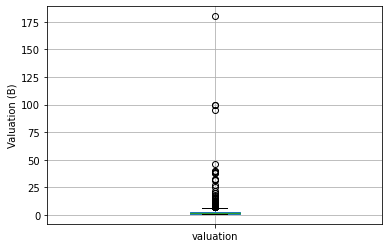

In [36]:
unicorn2022[['valuation']].boxplot()
#plt.xlabel('')
plt.ylabel('Valuation (B)')

In [37]:
# Most of companies valued between 1B to 3B. 
# There're SOME outliers with very high valuations compared to others.

unicorn2022.head(5)
# By inspection, top companies on the list are indeed high-valued. Keep these outliers.

,company,valuation,date_joined,industry,city,country,continent,year_founded,funding,select_investors
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.0,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,7.0,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.0,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.0,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.0,"Institutional Venture Partners, Sequoia Capita..."


##### - year_founded

Text(0, 0.5, 'Year Founded')

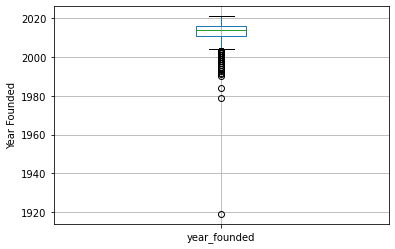

In [38]:
unicorn2022[['year_founded']].boxplot()
#plt.xlabel('')
plt.ylabel('Year Founded')

In [39]:
unicorn2022.loc[unicorn2022['year_founded'] == 1919]
# By inspection, this Germany company is founded in 1919. Keep it.

,company,valuation,date_joined,industry,city,country,continent,year_founded,funding,select_investors
189,Otto Bock HealthCare,4,2017-06-24,Health,Duderstadt,Germany,Europe,1919,0.0,EQT Partners


##### - funding

Text(0, 0.5, 'Funding (B)')

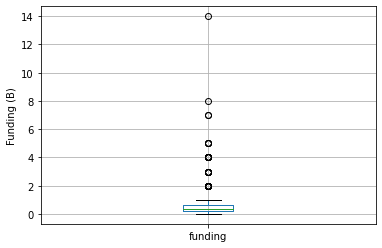

In [40]:
unicorn2022[['funding']].boxplot()
#plt.xlabel('')
plt.ylabel('Funding (B)')

In [41]:
unicorn2022.loc[unicorn2022['funding'] > 4]

# By inspection, no abnormals spotted.

,company,valuation,date_joined,industry,city,country,continent,year_founded,funding,select_investors
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.0,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,7.0,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
8,JUUL Labs,38,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015,14.0,Tiger Global Management
11,Epic Games,32,2018-10-26,Other,Cary,United States,North America,1991,7.0,"Tencent Holdings, KKR, Smash Ventures"
16,J&T Express,20,2021-04-07,"Supply chain, logistics, & delivery",Jakarta,Indonesia,Asia,2015,5.0,"Hillhouse Capital Management, Boyu Capital, Se..."
38,Xingsheng Selected,12,2020-07-22,E-commerce & direct-to-consumer,Changsha,China,Asia,2009,5.0,"KKR, Tencent Holdings, Sequoia Capital China"
41,Swiggy,11,2018-06-21,"Supply chain, logistics, & delivery",Bengaluru,India,Asia,2014,5.0,"Accel India, SAIF Partners, Norwest Venture Pa..."
43,Global Switch,11,2016-12-22,Hardware,London,United Kingdom,Europe,1998,5.0,"Aviation Industry Corporation of China, Essenc..."


In [42]:
unicorn2022.loc[unicorn2022['funding'] ==0]
# Zero funding is  suspicious， but a unicorn company can be included without investor's funding event. Keep it.

,company,valuation,date_joined,industry,city,country,continent,year_founded,funding,select_investors
189,Otto Bock HealthCare,4,2017-06-24,Health,Duderstadt,Germany,Europe,1919,0.0,EQT Partners


**(3) object**

In [43]:
unicorn2022.describe(include=[object])

,company,industry,city,country,continent,select_investors
count,1074,1074,1058,1074,1074,1073
unique,1073,16,256,46,6,1058
top,Bolt,Fintech,San Francisco,United States,North America,Sequoia Capital
freq,2,224,152,562,589,3


In [44]:
#unicorn2022.apply(lambda x:sum(x.duplicated()))

##### - company

In [45]:
unicorn2022.company.value_counts().head(1) #Bolt 

Bolt    2
Name: company, dtype: int64

In [46]:
unicorn2022.company.str.lower().duplicated().sum()

2

In [47]:
unicorn2022.company.str.lower().value_counts().head(5)

fabric              2
bolt                2
linksure network    1
nextiva             1
biren technology    1
Name: company, dtype: int64

In [48]:
# there's 2 duplicates in company names, need to further check them:

In [49]:
# 1. Bolt:

In [50]:
unicorn2022.loc[unicorn2022.company == 'Bolt'] # Two different companies with same name, no duplicates

,company,valuation,date_joined,industry,city,country,continent,year_founded,funding,select_investors
40,Bolt,11,2018-05-29,Auto & transportation,Tallinn,Estonia,Europe,2013,1.0,"Didi Chuxing, Diamler, TMT Investments"
44,Bolt,11,2021-10-08,Fintech,San Francisco,United States,North America,2014,1.0,"Activant Capital, Tribe Capital, General Atlantic"


In [51]:
# 2. Fabric
unicorn2022.loc[unicorn2022.company.str.lower() == 'fabric']

,company,valuation,date_joined,industry,city,country,continent,year_founded,funding,select_investors
671,fabric,1,2022-02-24,E-commerce & direct-to-consumer,Bellevue,United States,North America,2017,0.294,"Redpoint Ventures, Norwest Venture Partners, S..."
912,Fabric,1,2021-10-26,"Supply chain, logistics, & delivery",New York,United States,North America,2015,0.294,"Innovation Endeavors, Aleph, Temasek"


In [52]:
# They are different companies, so keep them.

##### - industry

In [53]:
np.sort(unicorn2022['industry'].unique())

array(['Artificial Intelligence', 'Artificial intelligence',
       'Auto & transportation', 'Consumer & retail', 'Cybersecurity',
       'Data management & analytics', 'E-commerce & direct-to-consumer',
       'Edtech', 'Fintech', 'Hardware', 'Health',
       'Internet software & services', 'Mobile & telecommunications',
       'Other', 'Supply chain, logistics, & delivery', 'Travel'],
      dtype=object)

In [54]:
print(len(np.sort(unicorn2022['industry'].unique())))
print(len(np.sort(unicorn2022['industry'].str.lower().unique())))

16
15


In [55]:
pd.Series(unicorn2022['industry'].unique()).str.lower().value_counts()

artificial intelligence                2
edtech                                 1
health                                 1
mobile & telecommunications            1
other                                  1
data management & analytics            1
supply chain, logistics, & delivery    1
fintech                                1
travel                                 1
hardware                               1
cybersecurity                          1
e-commerce & direct-to-consumer        1
auto & transportation                  1
internet software & services           1
consumer & retail                      1
dtype: int64

In [56]:
# Artificial intelligence & Artificial Intelligence

In [57]:
unicorn2022.loc[unicorn2022.industry == 'Artificial Intelligence']

,company,valuation,date_joined,industry,city,country,continent,year_founded,funding,select_investors
270,Uniphore,3,2022-02-16,Artificial Intelligence,Palo Alto,United States,North America,2008,0.607,"Chiratae Ventures, March Capital Partners, Nat..."
412,NotCo,2,2021-07-26,Artificial Intelligence,Santiago,Chile,South America,2015,0.370,"Kaszek Ventures, SOSV, Tiger Global Management"
443,Cresta,2,2022-03-17,Artificial Intelligence,San Francisco,United States,North America,2017,0.151,"Andreessen Horowitz, Greylock Partners, Sequoi..."
523,ConcertAI,2,2022-03-29,Artificial Intelligence,Boston,United States,North America,2018,0.300,"Sixth Street Partners, Declaration Partners, M..."
637,Shukun Technology,1,2021-08-16,Artificial Intelligence,Beijing,China,Asia,2017,0.211,"Marathon Venture Partners, Huagai Capital, Chi..."
643,TUNGEE,1,2021-12-15,Artificial Intelligence,Guangzhou,China,Asia,2016,0.171,"UNITY VENTURES, Qiming Venture Partners, GGV C..."
789,SmartMore,1,2021-06-24,Artificial Intelligence,Shenzhen,China,Asia,2019,0.300,"IDG Capital, ZhenFund, Sequoia Capital China"
863,Anyscale,1,2021-12-07,Artificial Intelligence,Berkeley,United States,North America,2019,0.160,"Andreessen Horowitz, Intel Capital, Foundation..."
896,CommerceIQ,1,2022-03-21,Artificial Intelligence,Palo Alto,United States,North America,2012,0.196,"Trinity Ventures, Madrona Venture Group, Shast..."
929,Haomao.AI,1,2021-12-22,Artificial Intelligence,Beijing,China,Asia,2019,0.157,"Qualcomm Ventures, Nine Intelligence Capital, ..."


In [58]:
unicorn2022.loc[unicorn2022.industry == 'Artificial Intelligence', 'industry'] = 'Artificial intelligence'
np.sort(unicorn2022['industry'].unique())

array(['Artificial intelligence', 'Auto & transportation',
       'Consumer & retail', 'Cybersecurity',
       'Data management & analytics', 'E-commerce & direct-to-consumer',
       'Edtech', 'Fintech', 'Hardware', 'Health',
       'Internet software & services', 'Mobile & telecommunications',
       'Other', 'Supply chain, logistics, & delivery', 'Travel'],
      dtype=object)

##### - city

In [59]:
unicorn2022.dtypes

company                     object
valuation                    int64
date_joined         datetime64[ns]
industry                    object
city                        object
country                     object
continent                   object
year_founded                 int64
funding                    float64
select_investors            object
dtype: object

In [60]:
#np.sort(unicorn2022['city'].unique()) # TypeError because there're nan, will check and fix it in the nest step

In [61]:
np.sort(unicorn2022['city'].dropna().unique())

array(['Aarhus', 'Aberdeen', 'Alameda', 'Alexandria', 'Altrincham',
       'Ambler', 'Amsterdam', 'Andheri', 'Arlington', 'Atlanta', 'Austin',
       'Bangalore', 'Bangkok', 'Barcelona', 'Beijing', 'Bellevue',
       'Bellingham', 'Bend', 'Bengaluru', 'Berkeley', 'Berkeley Heights',
       'Berlin', 'Bethesda', 'Boca Raton', 'Bogota', 'Boise', 'Boston',
       'Boulder', 'Brisbane', 'Bristol', 'Brooklyn', 'Bruchsal',
       'Brussels', 'Bryanston', 'Buenos Aires', 'Burlingame',
       'Burlington', 'Burnaby', 'Cambridge', 'Campinas', 'Carlsbad',
       'Carson City', 'Cary', 'Cedar Park', 'Central', 'Changsha',
       'Changzhou', 'Charlotte', 'Chatham', 'Chemnitz', 'Chengdu',
       'Chennai', 'Cheung Sha Wan', 'Chicago', 'Chongqing', 'Cincinnati',
       'Colchester', 'Colorado Springs', 'Columbus', 'Copenhagen',
       'Crewe', 'Croix', 'Culver City', 'Curitiba', 'Dakar', 'Dallas',
       'Denver', 'Detroit', 'Dongguan', 'Draper', 'Dubai', 'Dublin',
       'Duderstadt', 'Eden Prairi

##### - country

In [62]:
np.sort(unicorn2022['country'].unique())

array(['Argentina', 'Australia', 'Austria', 'Bahamas', 'Belgium',
       'Bermuda', 'Brazil', 'Canada', 'Chile', 'China', 'Colombia',
       'Croatia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland',
       'France', 'Germany', 'Hong Kong', 'India', 'Indonesia', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Lithuania', 'Luxembourg', 'Malaysia',
       'Mexico', 'Netherlands', 'Nigeria', 'Norway', 'Philippines',
       'Senegal', 'Singapore', 'South Africa', 'South Korea', 'Spain',
       'Sweden', 'Switzerland', 'Thailand', 'Turkey',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'Vietnam'], dtype=object)

##### - continent

In [63]:
np.sort(unicorn2022['continent'].unique())

array(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America'], dtype=object)

##### - select_investors

In [64]:
unicorn2022['select_investors'].value_counts().head(20)

Sequoia Capital                                                                                3
Two Sigma Ventures, Flint Capital, Commerce Ventures                                           2
Sequoia Capital China, Qiming Venture Partners, Tencent Holdings                               2
Speedinvest, Valar Ventures, Uniqa Ventures                                                    2
Insight Partners, Sequoia Capital, Index Ventures                                              2
Shunwei Capital Partners, China Media Group, Guangzhou Huiyin Aofeng Equity Investment Fund    2
Qualcomm Ventures, Accel, Canaan Partners                                                      2
Global Founders Capital, Shea Ventures, Greycroft                                              2
General Atlantic                                                                               2
Undisclosed                                                                                    2
Tiger Global Management, Sequo

**4. check null**

In [65]:
pd.isnull(unicorn2022).sum() 

company              0
valuation            0
date_joined          0
industry             0
city                16
country              0
continent            0
year_founded         0
funding             12
select_investors     1
dtype: int64

##### - city

In [66]:
no_city_df = unicorn2022.loc[pd.isnull(unicorn2022.city)]
print(no_city_df.shape) #(16, 10)
no_city_df

(16, 10)


,company,valuation,date_joined,industry,city,country,continent,year_founded,funding,select_investors
12,FTX,32,2021-07-20,Fintech,NaN,Bahamas,North America,2018,2.000,"Sequoia Capital, Thoma Bravo, Softbank"
170,HyalRoute,4,2020-05-26,Mobile & telecommunications,NaN,Singapore,Asia,2015,0.263,Kuang-Chi
242,Moglix,3,2021-05-17,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,0.471,"Jungle Ventures, Accel, Venture Highway"
251,Trax,3,2019-07-22,Artificial intelligence,NaN,Singapore,Asia,2010,1.000,"Hopu Investment Management, Boyu Capital, DC T..."
325,Amber Group,3,2021-06-21,Fintech,NaN,Hong Kong,Asia,2015,0.328,"Tiger Global Management, Tiger Brokers, DCM Ve..."
382,Ninja Van,2,2021-09-27,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,0.975,"B Capital Group, Monk's Hill Ventures, Dynamic..."
541,Advance Intelligence Group,2,2021-09-23,Artificial intelligence,NaN,Singapore,Asia,2016,0.536,"Vision Plus Capital, GSR Ventures, ZhenFund"
811,Carousell,1,2021-09-15,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,0.288,"500 Global, Rakuten Ventures, Golden Gate Vent..."
848,Matrixport,1,2021-06-01,Fintech,NaN,Singapore,Asia,2019,0.100,"Dragonfly Captial, Qiming Venture Partners, DS..."
880,bolttech,1,2021-07-01,Fintech,NaN,Singapore,Asia,2018,0.210,"Mundi Ventures, Doqling Capital Partners, Acti..."


In [67]:
ctry_no_city = unicorn2022.loc[pd.isnull(unicorn2022.city)].country.unique()
ctry_no_city

array(['Bahamas', 'Singapore', 'Hong Kong'], dtype=object)

In [68]:
# check if all of these coutries have no city
unicorn2022.loc[unicorn2022.country.isin(list(ctry_no_city))]

,company,valuation,date_joined,industry,city,country,continent,year_founded,funding,select_investors
12,FTX,32,2021-07-20,Fintech,NaN,Bahamas,North America,2018,2.000,"Sequoia Capital, Thoma Bravo, Softbank"
56,Lalamove,10,2019-02-21,"Supply chain, logistics, & delivery",Cheung Sha Wan,Hong Kong,Asia,2013,2.000,"MindWorks Ventures, Shunwei Capital Partners, ..."
170,HyalRoute,4,2020-05-26,Mobile & telecommunications,NaN,Singapore,Asia,2015,0.263,Kuang-Chi
242,Moglix,3,2021-05-17,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,0.471,"Jungle Ventures, Accel, Venture Highway"
251,Trax,3,2019-07-22,Artificial intelligence,NaN,Singapore,Asia,2010,1.000,"Hopu Investment Management, Boyu Capital, DC T..."
325,Amber Group,3,2021-06-21,Fintech,NaN,Hong Kong,Asia,2015,0.328,"Tiger Global Management, Tiger Brokers, DCM Ve..."
382,Ninja Van,2,2021-09-27,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,0.975,"B Capital Group, Monk's Hill Ventures, Dynamic..."
541,Advance Intelligence Group,2,2021-09-23,Artificial intelligence,NaN,Singapore,Asia,2016,0.536,"Vision Plus Capital, GSR Ventures, ZhenFund"
595,Trendy Group International,2,2012-02-13,Consumer & retail,Kowloon,Hong Kong,Asia,1999,0.200,L Capital Partners
720,Klook,1,2018-08-07,Travel,Central,Hong Kong,Asia,2014,0.722,"Sequoia Capital China, Goldman Sachs, Matrix P..."


In [69]:
# By inspection, need to conduct mannual corrections:

In [70]:
# 1.mannual checked city of FTX in Bahamas：Nassau
unicorn2022.loc[ unicorn2022.country == 'Bahamas', 'city' ] = 'Nassau'

In [71]:
# 2. Hong Kong
unicorn2022.loc[ unicorn2022.country == 'Hong Kong', 'city' ] = 'Hong Kong'

In [72]:
# 3. Singapore
unicorn2022.loc[ unicorn2022.country == 'Singapore', 'city' ] = 'Singapore'

In [73]:
# check result
unicorn2022.loc[unicorn2022.country.isin(list(ctry_no_city))]

,company,valuation,date_joined,industry,city,country,continent,year_founded,funding,select_investors
12,FTX,32,2021-07-20,Fintech,Nassau,Bahamas,North America,2018,2.000,"Sequoia Capital, Thoma Bravo, Softbank"
56,Lalamove,10,2019-02-21,"Supply chain, logistics, & delivery",Hong Kong,Hong Kong,Asia,2013,2.000,"MindWorks Ventures, Shunwei Capital Partners, ..."
170,HyalRoute,4,2020-05-26,Mobile & telecommunications,Singapore,Singapore,Asia,2015,0.263,Kuang-Chi
242,Moglix,3,2021-05-17,E-commerce & direct-to-consumer,Singapore,Singapore,Asia,2015,0.471,"Jungle Ventures, Accel, Venture Highway"
251,Trax,3,2019-07-22,Artificial intelligence,Singapore,Singapore,Asia,2010,1.000,"Hopu Investment Management, Boyu Capital, DC T..."
325,Amber Group,3,2021-06-21,Fintech,Hong Kong,Hong Kong,Asia,2015,0.328,"Tiger Global Management, Tiger Brokers, DCM Ve..."
382,Ninja Van,2,2021-09-27,"Supply chain, logistics, & delivery",Singapore,Singapore,Asia,2014,0.975,"B Capital Group, Monk's Hill Ventures, Dynamic..."
541,Advance Intelligence Group,2,2021-09-23,Artificial intelligence,Singapore,Singapore,Asia,2016,0.536,"Vision Plus Capital, GSR Ventures, ZhenFund"
595,Trendy Group International,2,2012-02-13,Consumer & retail,Hong Kong,Hong Kong,Asia,1999,0.200,L Capital Partners
720,Klook,1,2018-08-07,Travel,Hong Kong,Hong Kong,Asia,2014,0.722,"Sequoia Capital China, Goldman Sachs, Matrix P..."


##### - funding

In [74]:
unicorn2022.loc[unicorn2022.funding.isna()]

,company,valuation,date_joined,industry,city,country,continent,year_founded,funding,select_investors
215,SSENSE,4,2021-06-08,E-commerce & direct-to-consumer,Montreal,Canada,North America,2003,NaN,Sequoia Capital
424,Uplight,2,2021-03-03,Other,Boulder,United States,North America,2019,NaN,"Rubicon Technology Partners, Max Ventures, Inc..."
567,ISN,2,2020-12-17,"Supply chain, logistics, & delivery",Dallas,United States,North America,2001,NaN,Blackstone
639,SITECH DEV,1,2019-05-16,Other,Guiyang,China,Asia,2017,NaN,China Prosperity Capital
651,Xiaobing,1,2021-07-12,Fintech,Beijing,China,Asia,2020,NaN,"NetEase Capital, Northern Light Venture Capita..."
717,Veepee,1,2007-07-02,E-commerce & direct-to-consumer,La Plaine Saint-Denis,France,Europe,2001,NaN,"Summit Partners, Qatar Holding"
733,DistroKid,1,2021-08-16,Internet software & services,New York,United States,North America,2013,NaN,"Insight Partners, Silversmith Capital Partners..."
866,Assembly,1,2021-09-21,Internet software & services,Culver City,United States,North America,2019,NaN,"Advent International, PSG, Providence Equity P..."
890,Carson Group,1,2021-07-14,Fintech,Lincoln,United States,North America,2012,NaN,Bain Capital
945,Iodine Software,1,2021-12-01,Data management & analytics,Austin,United States,North America,2010,NaN,"Advent International, Bain Capital Ventures, S..."


In [75]:
# No processing conducted as this analysis do not need the funding feature.

**5. save a copy of cleaned data**

In [76]:
# save a copy of cleaned data
#unicorn2022_cleaned = unicorn2022.copy()
#unicorn2022.to_csv('data/Unicorn_Companies_cleaned.csv')

In [77]:
unicorn2022.shape # (1074, 10)

(1074, 10)

# Step 2: Analysis

In [78]:
unicorn2022.columns

Index(['company', 'valuation', 'date_joined', 'industry', 'city', 'country',
       'continent', 'year_founded', 'funding', 'select_investors'],
      dtype='object')

## I. Features of Unicorns

### Add features

In [79]:
unicorn2022.dtypes

company                     object
valuation                    int64
date_joined         datetime64[ns]
industry                    object
city                        object
country                     object
continent                   object
year_founded                 int64
funding                    float64
select_investors            object
dtype: object

**(1) year_joined**

In [80]:
unicorn2022['year_joined'] = pd.to_datetime(unicorn2022.date_joined).dt.year
unicorn2022['year_joined'].head()

0    2017
1    2012
2    2018
3    2014
4    2011
Name: year_joined, dtype: int64

**(2) year_current**

In [81]:
unicorn2022['year_current'] = pd.to_datetime('today').year
unicorn2022['year_current'].head()

0    2022
1    2022
2    2022
3    2022
4    2022
Name: year_current, dtype: int64

**(3) years_to_unicorn**

In [82]:
unicorn2022['years_to_unicorn'] = unicorn2022.date_joined.dt.year - unicorn2022.year_founded
unicorn2022['years_to_unicorn'].head()

0     5
1    10
2    10
3     4
4     6
Name: years_to_unicorn, dtype: int64

**(4) years_joined**

In [83]:
unicorn2022['years_joined'] = unicorn2022.year_current - unicorn2022.date_joined.dt.year
unicorn2022['years_joined'].head()

0     5
1    10
2     4
3     8
4    11
Name: years_joined, dtype: int64

In [84]:
unicorn2022.dtypes

company                     object
valuation                    int64
date_joined         datetime64[ns]
industry                    object
city                        object
country                     object
continent                   object
year_founded                 int64
funding                    float64
select_investors            object
year_joined                  int64
year_current                 int64
years_to_unicorn             int64
years_joined                 int64
dtype: object

Text(0, 0.5, 'Years to unicorn since founded')

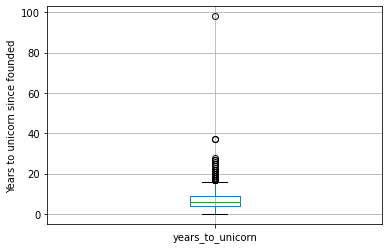

In [85]:
unicorn2022[['years_to_unicorn']].boxplot()
#plt.xlabel('')
plt.ylabel('Years to unicorn since founded')

In [86]:
unicorn2022['years_to_unicorn'].median()

6.0

In [87]:
unicorn2022['years_to_unicorn'].describe()

count    1074.000000
mean        7.008380
std         5.319864
min         0.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        98.000000
Name: years_to_unicorn, dtype: float64

### 1. Location/Geograph: continent, country, city

In [88]:
unicorn2022.continent.describe() # 6 continents

count              1074
unique                6
top       North America
freq                589
Name: continent, dtype: object

In [89]:
unicorn2022.country.describe() # 46 countries

count              1074
unique               46
top       United States
freq                562
Name: country, dtype: object

In [90]:
unicorn2022.city.describe() # 256 cities

count              1074
unique              256
top       San Francisco
freq                152
Name: city, dtype: object

**1 continent**

In [91]:
unicorn2022.groupby('continent')['company'].count().sort_values(ascending=False)

continent
North America    589
Asia             310
Europe           143
South America     21
Oceania            8
Africa             3
Name: company, dtype: int64

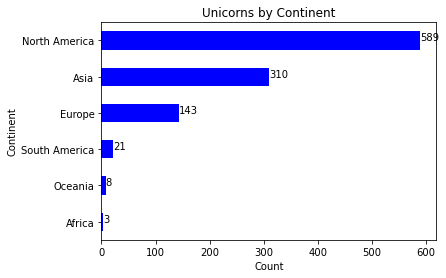

In [92]:
unicorn2022.groupby('continent')['company'].count().sort_values().plot(color = 'b',kind = 'barh')

for index, value in enumerate(unicorn2022.groupby('continent')['company'].count().sort_values()):
    plt.text(value, index, str(value))

plt.xlabel('Count')
plt.ylabel('Continent')
plt.title('Unicorns by Continent')

plt.show()

In [93]:
df_cnt = unicorn2022.groupby('continent')['company'].count().sort_values(ascending=True).reset_index()
df_cnt_country = unicorn2022.groupby('continent')['country'].nunique().reset_index()

df_cnt_ctry = df_cnt.merge(df_cnt_country, on='continent', how='left')

df_cnt_ctry = df_cnt_ctry.set_index('continent').copy()
df_cnt_ctry

,company,country
continent,,
Africa,3,3
Oceania,8,1
South America,21,4
Europe,143,20
Asia,310,14
North America,589,5


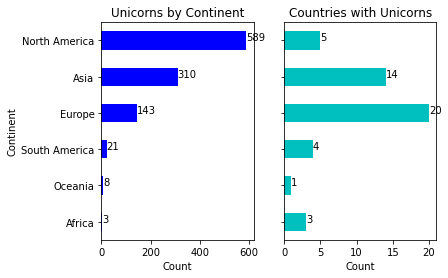

In [94]:
# plot 1
ax_cnt1 = plt.subplot(121)
df_cnt_ctry.company.plot(color = 'b',kind = 'barh')

for index, value in enumerate(df_cnt_ctry.company):
    plt.text(value, index, str(value))

plt.xlabel('Count')
plt.ylabel('Continent')
plt.title('Unicorns by Continent')


# plot 2
ax_cnt2 = plt.subplot(122,sharey=ax_cnt1)
df_cnt_ctry.country.plot(color = 'c',kind = 'barh')#,sharey = ax_cnt1)

for index, value in enumerate(df_cnt_ctry.country):
    plt.text(value, index, str(value))
    
plt.xlabel('Count')
plt.ylabel('Continent')
plt.title('Countries with Unicorns')

plt.show()

**2. Country**

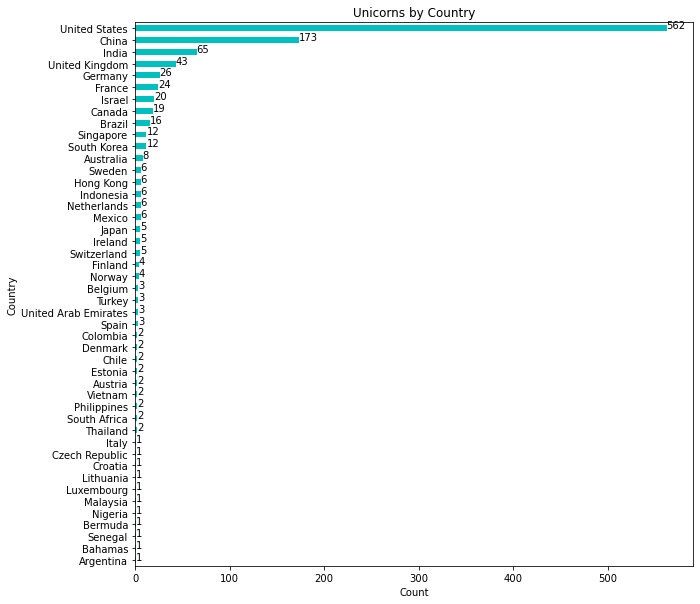

In [95]:
plt.figure(figsize=(10,10)) 

unicorn2022.groupby('country')['company'].count().sort_values().plot(color = 'c',kind = 'barh')

for index, value in enumerate(unicorn2022.groupby('country')['company'].count().sort_values()):
    plt.text(value, index, str(value))

plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Unicorns by Country')

plt.show()

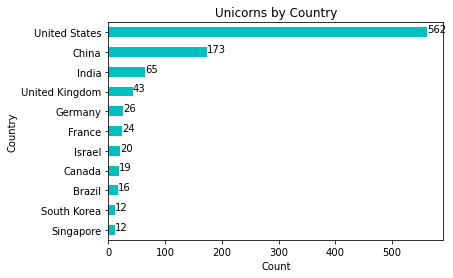

In [96]:
df_country_10 = unicorn2022.groupby('country').filter(lambda x: x.shape[0] >= 10).groupby('country')['company'].count().sort_values()

df_country_10.plot(color = 'c',kind = 'barh')

for index, value in enumerate(df_country_10):
    plt.text(value, index, str(value))

plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Unicorns by Country')

plt.show()

In [97]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot


plt.figure(figsize=(10,10)) 

init_notebook_mode(connected=True)

data = dict(type = 'choropleth',
            colorscale = 'Jet',
            locations = unicorn2022['country'],
            locationmode = "country names",
            z = unicorn2022.groupby('country')['company'].count(),
            text = unicorn2022['country'],
            colorbar = {'title' : 'Count'}
           )

layout = dict(title = 'Unicorns by Country',geo = dict(showframe = False,projection = {'type':'mercator'}))
chmap = go.Figure(data = [data],layout = layout)
iplot(chmap)

<Figure size 720x720 with 0 Axes>

In [98]:
tmp1 = unicorn2022.loc[unicorn2022.country.isin(['United States','China','India','United Kingdom'])].\
    groupby('country').agg({'company': 'count'}).sort_values('company',ascending=False)
    
tmp1['percentage'] = tmp1.company/len(unicorn2022.company)
print(tmp1)
print(tmp1.percentage.sum())

                company  percentage
country                            
United States       562    0.523277
China               173    0.161080
India                65    0.060521
United Kingdom       43    0.040037
0.7849162011173184


**3. City**

In [99]:
unicorn2022.groupby(['continent','country','city']).company.count().sort_values(ascending=False).head(20)

continent      country         city         
North America  United States   San Francisco    152
                               New York         103
Asia           China           Beijing           63
                               Shanghai          44
Europe         United Kingdom  London            34
Asia           India           Bengaluru         29
               China           Shenzhen          19
Europe         France          Paris             19
North America  United States   Palo Alto         18
Europe         Germany         Berlin            17
North America  United States   Mountain View     16
                               Boston            16
Asia           China           Hangzhou          16
North America  United States   Chicago           16
Asia           Singapore       Singapore         12
North America  United States   San Mateo         11
South America  Brazil          Sao Paulo         11
Asia           Israel          Tel Aviv          11
               Sout

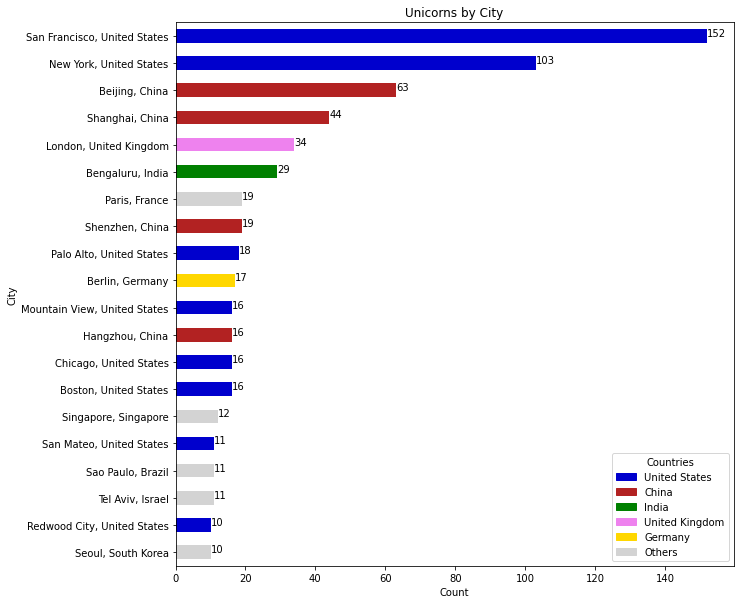

In [100]:
plt.figure(figsize=(10,10)) 
colors = {'United States':'mediumblue', 
          'China':'firebrick',
          'Germany':'gold',
          'India':'green', 
          'United Kingdom':'violet', 
          'South Korea':'lightgrey', 
          'Israel':'lightgrey', 
          'Brazil':'lightgrey',
          'Singapore':'lightgrey',
          'France':'lightgrey',
          'Others':'lightgrey'}

df_city_10 = unicorn2022.groupby(['city','country']).filter(lambda x: x.shape[0] >= 10).groupby(['city','country'])['company'].count().sort_values().reset_index()
df_city_10['index'] = df_city_10.city + ', '+df_city_10.country


city = pd.Series(df_city_10.iloc[:,2].values, index=df_city_10.iloc[:,3])
city.plot(kind='barh', color=[colors[i] for i in df_city_10['country']])


for index, value in enumerate(city):
    plt.text(value, index, str(value))

plt.xlabel('Count')
plt.ylabel('City')
plt.title('Unicorns by City')


labels = ('United States','China', 'India','United Kingdom','Germany','Others')
handles = [plt.Rectangle((0,0),1,1, color=colors[l]) for l in labels]
plt.legend(handles, labels, title="Countries")


plt.show()

### 2. Industry

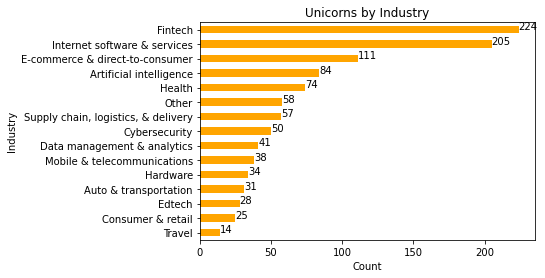

In [101]:
unicorn2022.groupby('industry')['company'].count().sort_values().plot(color = 'orange',kind = 'barh')

for index, value in enumerate(unicorn2022.groupby('industry')['company'].count().sort_values()):
    plt.text(value, index, str(value))


plt.xlabel('Count')
plt.ylabel('Industry')
plt.title('Unicorns by Industry')

plt.show()

### 3. Valuation

In [102]:
unicorn2022.valuation.describe()

count    1074.000000
mean        3.455307
std         8.547022
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       180.000000
Name: valuation, dtype: float64

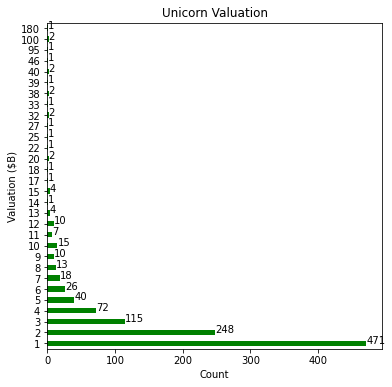

In [103]:
plt.figure(figsize=(6,6)) 
unicorn2022.groupby('valuation')['company'].count().plot(color = 'g',kind = 'barh')

for index, value in enumerate(unicorn2022.groupby('valuation')['company'].count()):
    plt.text(value, index, str(round(value,1)))
    
plt.xlabel('Count')
plt.ylabel('Valuation ($B)')
plt.title('Unicorn Valuation')

plt.show()

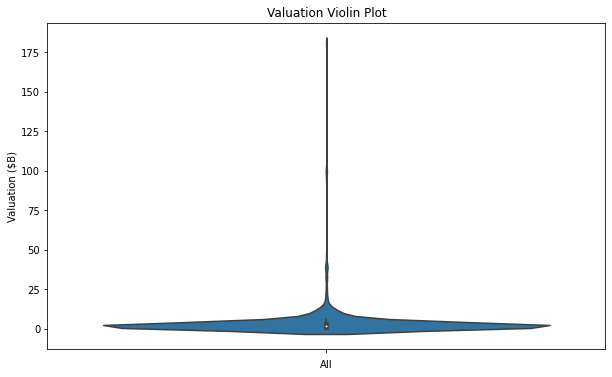

In [104]:
plt.figure(figsize=(10,6)) 
sns.violinplot(y=unicorn2022.valuation)

plt.xlabel('All')
plt.ylabel('Valuation ($B)')
plt.title('Valuation Violin Plot')

plt.show()

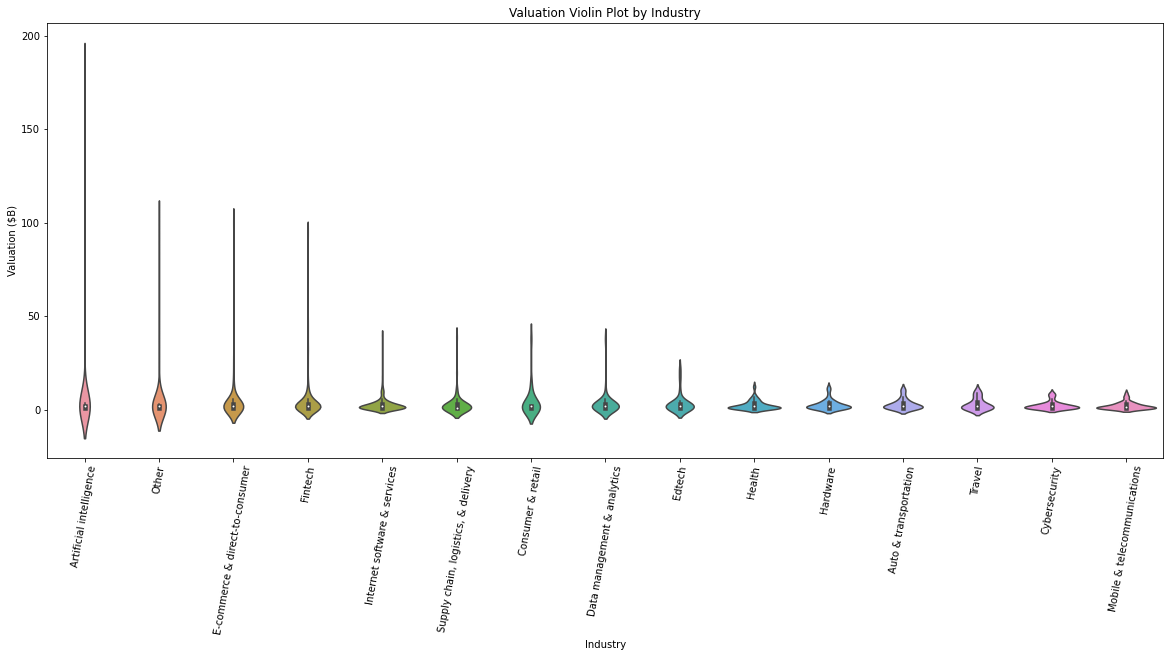

In [105]:
plt.figure(figsize=(20,8)) 
#sns.set(font_scale = 1.6,style='white')
sns.violinplot(x = unicorn2022.industry, y=unicorn2022.valuation)

plt.xlabel('Industry')#,rotation = 45)
plt.xticks(rotation=80)
plt.ylabel('Valuation ($B)')
plt.title('Valuation Violin Plot by Industry')

plt.show()
#sns.reset_defaults()

In [106]:
unicorn2022.groupby('industry')['valuation'].mean().loc[unicorn2022.industry.value_counts().index]

Fintech                                3.937500
Internet software & services           2.902439
E-commerce & direct-to-consumer        3.837838
Artificial intelligence                4.488095
Health                                 2.675676
Other                                  4.344828
Supply chain, logistics, & delivery    3.105263
Cybersecurity                          2.580000
Data management & analytics            3.317073
Mobile & telecommunications            2.342105
Hardware                               2.911765
Auto & transportation                  3.193548
Edtech                                 3.571429
Consumer & retail                      4.240000
Travel                                 3.285714
Name: valuation, dtype: float64

In [107]:
unicorn2022.groupby('industry')['valuation'].median().loc[unicorn2022.industry.value_counts().index]

Fintech                                2.0
Internet software & services           2.0
E-commerce & direct-to-consumer        2.0
Artificial intelligence                2.0
Health                                 2.0
Other                                  2.0
Supply chain, logistics, & delivery    1.0
Cybersecurity                          2.0
Data management & analytics            2.0
Mobile & telecommunications            1.5
Hardware                               2.0
Auto & transportation                  2.0
Edtech                                 2.0
Consumer & retail                      2.0
Travel                                 2.0
Name: valuation, dtype: float64

### 4. Years

**(1) Year joined**

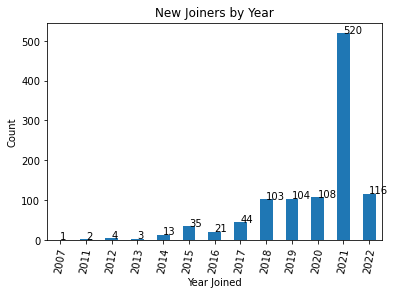

In [108]:
unicorn2022.groupby('year_joined').company.count().plot(kind='bar')

for index, value in enumerate(unicorn2022.groupby('year_joined').company.count()):
    plt.text(index,value,str(value))


plt.xlabel('Year Joined')#,rotation = 45)
plt.xticks(rotation=80)
plt.ylabel('Count')
plt.title('New Joiners by Year')

plt.show()

In [109]:
print(f'2015 Increase: {round((35/13-1)*100,2)}%')
print(f'2018 Increase: {round((103/44-1)*100,2)}%')
print(f'2021 Increase: {round((520/108-1)*100,2)}%')

2015 Increase: 169.23%
2018 Increase: 134.09%
2021 Increase: 381.48%


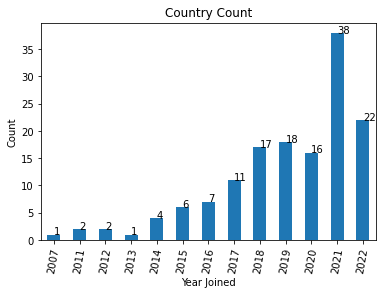

In [110]:
unicorn2022.groupby('year_joined').country.nunique().plot(kind='bar')

for index, value in enumerate(unicorn2022.groupby('year_joined').country.nunique()):
    plt.text(index,value,str(value))


plt.xlabel('Year Joined')#,rotation = 45)
plt.xticks(rotation=80)
plt.ylabel('Count')
plt.title('Country Count')

plt.show()

**2. Years to unicorn**

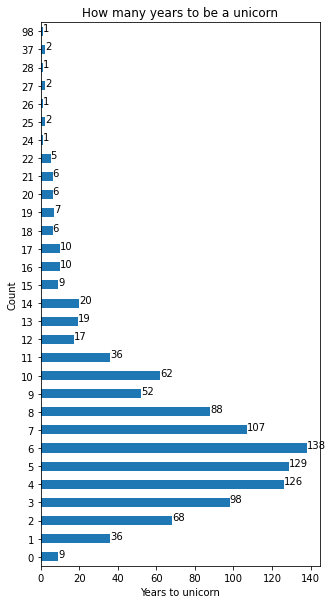

In [111]:
plt.figure(figsize=(5,10))
unicorn2022.groupby('years_to_unicorn')['company'].count().plot(kind = 'barh')

for index, value in enumerate(unicorn2022.groupby('years_to_unicorn')['company'].count()):
    plt.text(value, index, str(value))
    
plt.ylabel('Count')
plt.xlabel('Years to unicorn')
plt.title('How many years to be a unicorn')

plt.show()

In [112]:
unicorn2022.head()

,company,valuation,date_joined,industry,city,country,continent,year_founded,funding,select_investors,year_joined,year_current,years_to_unicorn,years_joined
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.0,"Sequoia Capital China, SIG Asia Investments, S...",2017,2022,5,5
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,7.0,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,2022,10,10
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.0,"Tiger Global Management, Sequoia Capital China...",2018,2022,10,4
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.0,"Khosla Ventures, LowercaseCapital, capitalG",2014,2022,4,8
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.0,"Institutional Venture Partners, Sequoia Capita...",2011,2022,6,11


**Analysis:**
1. North America has the most unicorns. 
United States and China rated top 2 across the globe. More than 50% of unicorns come from the U.S. and over 16% of unicorns are from China. Also, these two countries lead in the number of top cities as well. They have multiple startup hubs across the nation.
2. Most of these unicorns are in technology subsectors and unicorn companies of many other traditional industries are also tech-based.
3. Except for some super big companies, such as ByteDance and SpaceX, average valuations of unicorns range from $\$$1B to $\$$2B. There's no significant difference among industries.
4. Unicorn booms occurred in 2015, 2018, and 2021. Especially in 2021, there were 520 companies from 38 countries joining the world unicorn club which is a 381% increase from the previous year in terms number of companies.

Based on the study on single features of unicorns, the analysis dives into more complex dimensions with two questions:
1. As the top two countries with the most unicorn companies, how do U.S. and China differ in terms of industry, recent trend, and valuation?
2. What happened in the unicorn boom years?

# II. Further  exploration

## A. Compare unicorns of U.S vs China

**1. Industry**

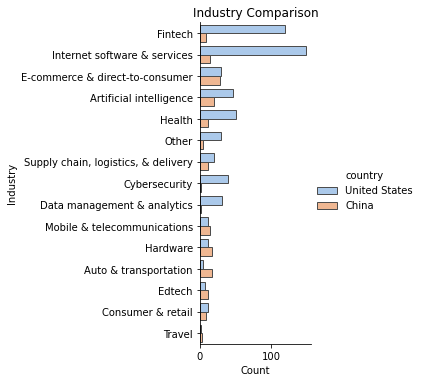

In [113]:
hue_order = ['United States','China']

sns.catplot(y="industry", hue="country", kind="count",
            palette="pastel", edgecolor="0.3",
            data=unicorn2022.loc[unicorn2022.country.isin(['United States','China'])],
            order=unicorn2022.industry.value_counts().index,
            hue_order = hue_order)

plt.xlabel('Count')
plt.ylabel('Industry')
plt.title('Industry Comparison')

plt.show()

In [114]:
tmp2 = unicorn2022.loc[unicorn2022.country.isin(['China',"United States"])].industry.\
    groupby(unicorn2022.country).value_counts(normalize=True).rename('prop').reset_index()
#tmp2
#tmp2.prop.sum()

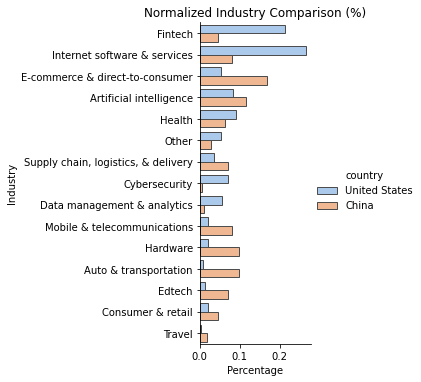

In [115]:
sns.catplot(y='industry',x='prop',hue='country', kind='bar',
            palette="pastel", edgecolor="0.3",
            data=tmp2,
            order=unicorn2022.industry.value_counts().index,
            hue_order=hue_order)

plt.xlabel('Percentage')
plt.ylabel('Industry')
plt.title('Normalized Industry Comparison (%)')

plt.show()

plt.show()

**2. Recent Trend (2021)**

[Text(0.5, 1.0, 'New Joiners by Year'),
 Text(0.5, 0, 'Year Joined'),
 Text(0, 0.5, 'Count')]

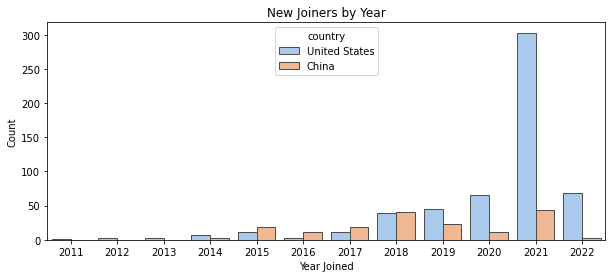

In [116]:
plt.figure(figsize=(10,4))
sns.countplot(x="year_joined", hue="country",
              palette="pastel", edgecolor=".3",
              data=unicorn2022.loc[unicorn2022.country.isin(["United States","China"])],
              hue_order = hue_order).\
              set(title='New Joiners by Year',xlabel='Year Joined',ylabel='Count')

In [117]:
unicorn2022.loc[(unicorn2022['year_joined'] == 2021) & (unicorn2022['country'] == "United States")].company.count()/unicorn2022.loc[(unicorn2022['country'] == "United States")].company.count()

0.5391459074733096

In [118]:
(unicorn2022.loc[(unicorn2022['year_joined'] == 2021) & (unicorn2022['country'] == "United States")].company.count()/ \
unicorn2022.loc[(unicorn2022['year_joined'] == 2020) & (unicorn2022['country'] == "United States")].company.count()) -1

3.661538461538462

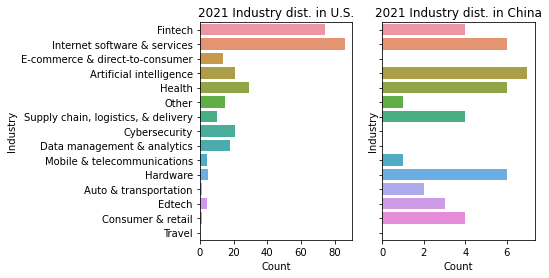

In [119]:
fig, axs = plt.subplots(ncols=2 ,sharey=True)

sns.countplot(y ='industry',
              data = unicorn2022.loc[(unicorn2022['year_joined'] == 2021) & (unicorn2022['country'] == "United States")], 
              ax=axs[0],
              order=unicorn2022.industry.value_counts().index).\
              set(title='2021 Industry dist. in U.S.',xlabel='Count',ylabel='Industry')


sns.countplot(y ='industry',
              data = unicorn2022.loc[(unicorn2022['year_joined'] == 2021) & (unicorn2022['country'] == "China")], 
              ax=axs[1],
              order=unicorn2022.industry.value_counts().index).\
              set(title='2021 Industry dist. in China',xlabel='Count',ylabel='Industry')


plt.show()

**3. Valuation**

In [120]:
top2_val = unicorn2022.loc[unicorn2022.country.isin(["United States","China"])].groupby(["country","industry"]).\
agg({"company": "count","valuation":"sum"}).\
reset_index()
top2_val['avg_valuation'] = top2_val.valuation/top2_val.company
top2_val

#groupby('continent')['company'].count().sort_values(ascending=True).reset_index()

,country,industry,company,valuation,avg_valuation
0,China,Artificial intelligence,20,214,10.700000
1,China,Auto & transportation,17,50,2.941176
2,China,Consumer & retail,8,38,4.750000
3,China,Cybersecurity,1,1,1.000000
4,China,Data management & analytics,2,3,1.500000
5,China,E-commerce & direct-to-consumer,29,187,6.448276
6,China,Edtech,12,43,3.583333
7,China,Fintech,8,10,1.250000
8,China,Hardware,17,54,3.176471
9,China,Health,11,26,2.363636


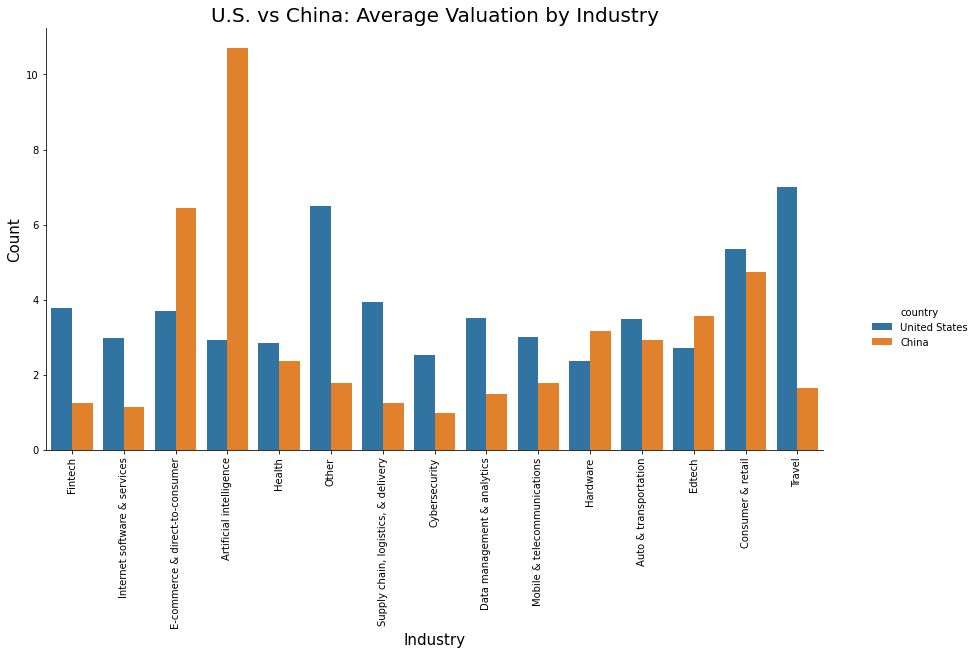

In [121]:
g = sns.catplot(x='industry', y='avg_valuation', data=top2_val, kind='bar', hue='country',hue_order=["United States","China"],order=unicorn2022.industry.value_counts().index)

#g.set_xticklabels('Industry',rotation=80)
g.fig.set_size_inches(15,8)
g.fig.subplots_adjust(top=0.81,right=0.86)  

plt.xlabel('Industry',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('U.S. vs China: Average Valuation by Industry',fontsize=20)


plt.xticks(rotation=90)

plt.show()

#sns.set(font_scale = 1.2,style='white')
#sns.reset_defaults()

In [122]:
unicorn2022.loc[unicorn2022.industry == 'Other'].loc[unicorn2022.country.isin(["United States"])] # SPACEX

,company,valuation,date_joined,industry,city,country,continent,year_founded,funding,select_investors,year_joined,year_current,years_to_unicorn,years_joined
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,7.000,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,2022,10,10
11,Epic Games,32,2018-10-26,Other,Cary,United States,North America,1991,7.000,"Tencent Holdings, KKR, Smash Ventures",2018,2022,27,4
60,Thrasio,10,2020-07-15,Other,Walpole,United States,North America,2018,2.000,"Upper90, RiverPark Ventures, Advent International",2020,2022,2,2
102,Black Unicorn Factory,6,2021-05-20,Other,Los Angeles,United States,North America,2020,0.645,Barter Ventures,2021,2022,1,1
200,Redwood Materials,4,2021-07-28,Other,Carson City,United States,North America,2017,0.792,"Breakthrough Energy Ventures, Capricorn Invest...",2021,2022,4,1
212,Relativity Space,4,2020-11-23,Other,Inglewood,United States,North America,2016,1.000,"Playground Global, Bond, Tribe Capital",2020,2022,4,2
227,Farmers Business Network,4,2020-08-03,Other,San Carlos,United States,North America,2014,0.870,"Blackrock, Kleiner Perkins Caulfield & Byers, ...",2020,2022,6,2
255,A24 Films,3,2022-03-09,Other,New York,United States,North America,2012,0.225,"Stripes Group, Neuberger Berman",2022,2022,10,0
293,Sila Nanotechnologies,3,2019-04-16,Other,Alameda,United States,North America,2011,0.880,"Bessemer Venture Partners, Sutter Hill Venture...",2019,2022,8,3
419,Solugen,2,2021-09-10,Other,Houston,United States,North America,2016,0.435,"Fifty Years Fund, Refactor Capital, Temasek",2021,2022,5,1


In [123]:
#top2_val

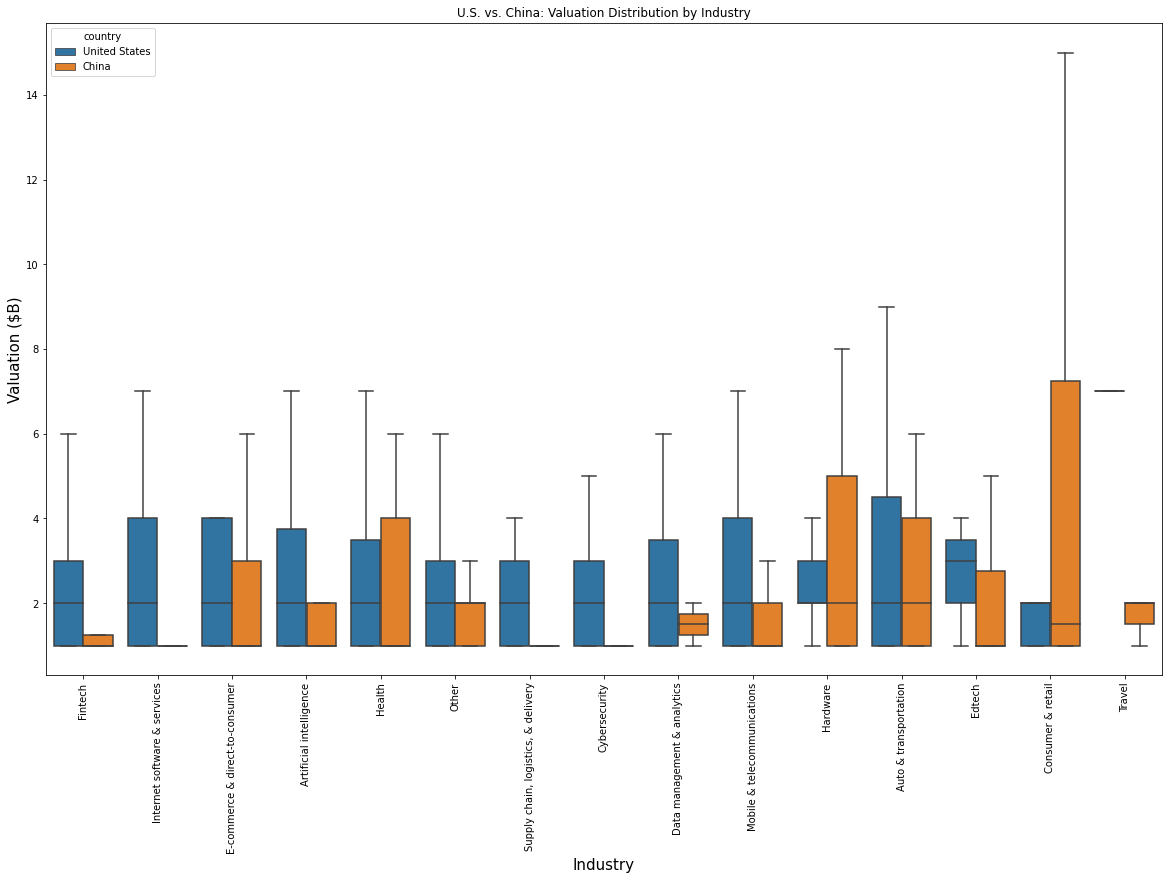

In [124]:
top2_val_2 = unicorn2022.loc[unicorn2022.country.isin(["United States","China"])]#.groupby(["country","industry"]).\
#agg({'company': 'count',"valuation":"sum"}).\
#reset_index()


plt.figure(figsize=(20,12)) 
#sns.set(font_scale = 1.6,style='white')
sns.boxplot(x = top2_val_2.industry, y=top2_val_2.valuation, hue=top2_val_2.country, hue_order=hue_order,showfliers=False,order=unicorn2022.industry.value_counts().index)


plt.xlabel('Industry',fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Valuation ($B)',fontsize=15)
plt.title('U.S. vs. China: Valuation Distribution by Industry')

plt.show()
#sns.reset_defaults()

## B. Unicorn boom years

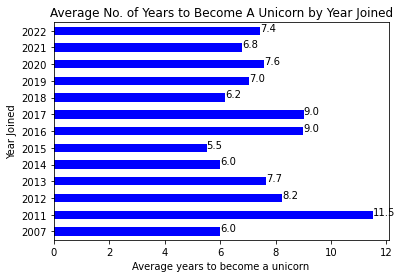

In [125]:
#plt.figure(figsize=(6,6)) 

unicorn2022.groupby('year_joined')['years_to_unicorn'].mean().plot(color = 'b',kind = 'barh')

for index, value in enumerate(unicorn2022.groupby('year_joined')['years_to_unicorn'].mean()):
    plt.text(value, index, str(round(value,1)))
    
plt.xlabel('Average years to become a unicorn')
plt.ylabel('Year Joined')
plt.title('Average No. of Years to Become A Unicorn by Year Joined')

plt.show()

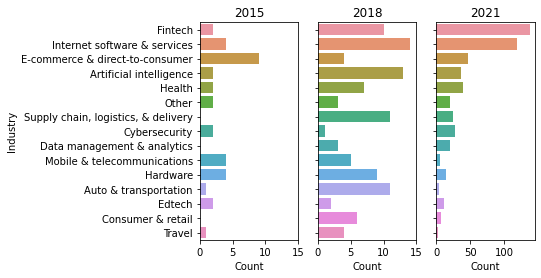

In [126]:
fig, axs = plt.subplots(ncols=3 ,sharey=True)

#1
sns.countplot(y ='industry',
              data = unicorn2022.loc[(unicorn2022['year_joined'] == 2015)], 
              ax=axs[0],
              order=unicorn2022.industry.value_counts().index).\
              set(title='2015',xlabel='Count',ylabel='Industry',xlim=(0,15))


sns.countplot(y ='industry',
              data = unicorn2022.loc[(unicorn2022['year_joined'] == 2018) ], 
              ax=axs[1],
              order=unicorn2022.industry.value_counts().index).\
              set(title='2018',xlabel='Count',ylabel='',xlim=(0,15))


sns.countplot(y ='industry',
              data = unicorn2022.loc[(unicorn2022['year_joined'] == 2021) ], 
              ax=axs[2],
              order=unicorn2022.industry.value_counts().index).\
              set(title='2021',xlabel='Count',ylabel='')


plt.show()

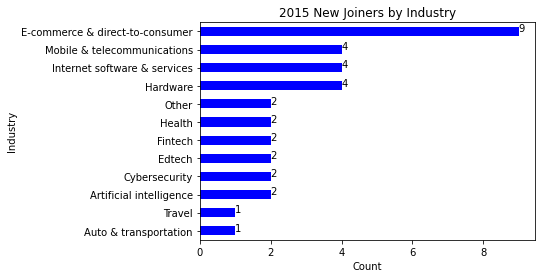

In [127]:
#plt.figure(figsize=(10,10)) 

unicorn2022.loc[unicorn2022.year_joined == 2015].groupby('industry')['company'].count().sort_values().plot(color = 'b',kind = 'barh')

for index, value in enumerate(unicorn2022.loc[unicorn2022.year_joined == 2015].groupby('industry')['company'].count().sort_values()):
    plt.text(value, index, str(round(value,1)))
    
plt.xlabel('Count')
plt.ylabel('Industry')
plt.title('2015 New Joiners by Industry')

plt.show()

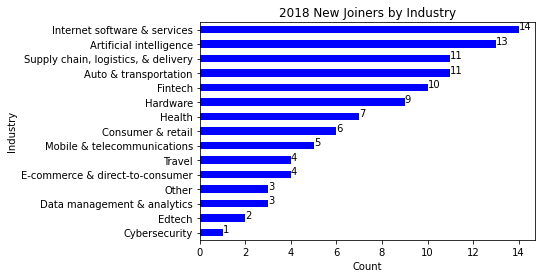

In [128]:
#plt.figure(figsize=(10,10)) 

unicorn2022.loc[unicorn2022.year_joined == 2018].groupby('industry')['company'].count().sort_values().plot(color = 'b',kind = 'barh')

for index, value in enumerate(unicorn2022.loc[unicorn2022.year_joined == 2018].groupby('industry')['company'].count().sort_values()):
    plt.text(value, index, str(round(value,1)))
    
plt.xlabel('Count')
plt.ylabel('Industry')
plt.title('2018 New Joiners by Industry')

plt.show()

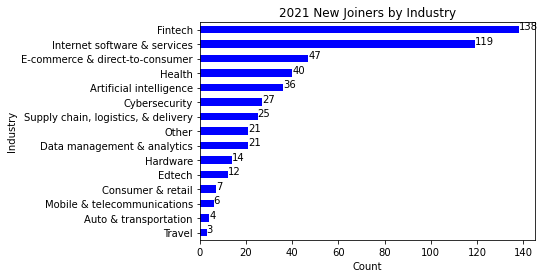

In [129]:
#plt.figure(figsize=(10,10)) 

unicorn2022.loc[unicorn2022.year_joined == 2021].groupby('industry')['company'].count().sort_values().plot(color = 'b',kind = 'barh')

for index, value in enumerate(unicorn2022.loc[unicorn2022.year_joined == 2021].groupby('industry')['company'].count().sort_values()):
    plt.text(value, index, str(round(value,1)))
    
plt.xlabel('Count')
plt.ylabel('Industry')
plt.title('2021 New Joiners by Industry')

plt.show()

**Analysis**\
**I.** 
* U.S. is mostly concentrated in fintech and internet software & services. The distribution in China is relatively dispersed. Top 1 is e-commerce & DTC and AI, and other major industries (AI, mobile, hardware, auto & transportation, editech) are about at a similar level.
* There's a major hike in U.S. in 2021. In China, the number of new joiners has decreased since 2018 and the downward trend reversed in 2021.
* Top-ranked unicorns with extremely high valuations contribute to the high average industry valuation. Excluding these companies, the average valuations of unicorns in the U.S. and China are comparable to the worldwide average.

**II.**
* The average number of years to become a unicorn since founded is relatively shorter in unicorn boom years.
* The three observed unicorn booms are contributed by different industries each year. Top contributors in each year were: e-commerce & DTC in 2015, internet software & services in 2018, and fintech in 2021.